# Udacity Data Science NanoDegree program project 1

imported the neccesary modules and data. decided to dig into the StackOverflow 2019 survey data

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


check the dimensions of data set

In [135]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1]  #Provide the number of columns in the dataset
print(num_rows,num_cols)

88883 85


set the output box size to view all datas

In [136]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.dtypes)

Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
OpenSource                 object
Employment                 object
Country                    object
Student                    object
EdLevel                    object
UndergradMajor             object
EduOther                   object
OrgSize                    object
DevType                    object
YearsCode                  object
Age1stCode                 object
YearsCodePro               object
CareerSat                  object
JobSat                     object
MgrIdiot                   object
MgrMoney                   object
MgrWant                    object
JobSeek                    object
LastHireDate               object
LastInt                    object
FizzBuzz                   object
JobFactors                 object
ResumeUpdate               object
CurrencySymbol             object
CurrencyDesc               object
CompTotal     

check percentage of null values

In [138]:
no_nulls = set(df.columns[df.isnull().mean()==0])   #columns having zero null value
no_nulls

{'Hobbyist', 'OpenSourcer', 'Respondent'}

In [139]:
nulls_more_than_25 = set(df.columns[df.isnull().mean()>0.25]) #columns having more than 25% null value
nulls_more_than_25

{'BlockchainIs',
 'BlockchainOrg',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'UnitTests',
 'WebFrameDesireNextYear',
 'WebFrameWorkedWith',
 'WorkWeekHrs'}

In [140]:
nulls_more_than_50 = set(df.columns[df.isnull().mean()>0.5])    #columns having more than 50% null value
nulls_more_than_50

set()

function for plotting graph using column name only

In [141]:
def Plot_Graph(column_name,Title):
    '''
    INPUT - TITLE - string - title of the plot
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            plot-bar- bar plot of the column
    '''
    status_vals = df[column_name].value_counts()

    (status_vals/df.shape[0]).plot(kind="bar");
    plt.title(Title);
    plt.show();
    

pass column name and title to plot the graph

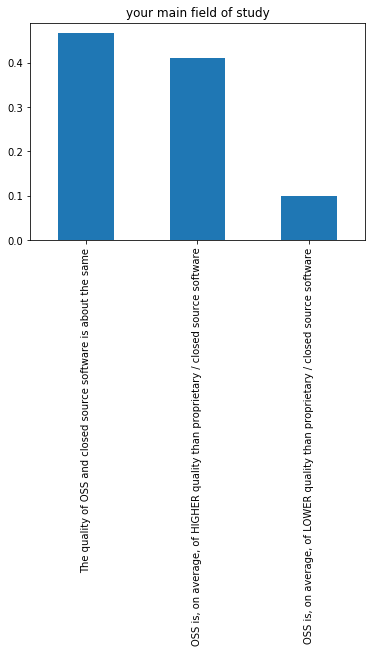

In [142]:
Plot_Graph('OpenSource', "your main field of study")

code to get the information about the column means the data stored in the column

In [143]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc


call below function to get description of columns

In [145]:
get_description('Country')

'In which country do you currently reside?'

count frequency of each item set in the column just write the column name

In [146]:
def count_freq_for_each(column_name):
    '''
    INPUT - column_name - string - the name of the column you would like to know about
    
    OUTPUT - result - string - the count pf indivisual in the column
    '''
    result = (df[column_name].value_counts())
    return result


In [147]:
count_freq_for_each('WorkWeekHrs')

40.000000      30131
45.000000       6352
50.000000       4656
35.000000       3159
37.500000       1662
42.000000       1566
30.000000       1558
38.000000       1551
60.000000       1449
37.000000       1025
8.000000         916
48.000000        814
20.000000        774
44.000000        742
36.000000        617
55.000000        606
32.000000        495
39.000000        476
43.000000        448
9.000000         409
25.000000        355
10.000000        329
70.000000        318
41.000000        311
80.000000        222
24.000000        183
15.000000        176
46.000000        159
42.500000        150
54.000000        139
65.000000        138
375.000000       136
56.000000        126
160.000000       124
7.000000         121
47.000000        108
16.000000        103
12.000000        102
6.000000         101
38.500000         99
52.000000         87
168.000000        86
34.000000         86
5.000000          74
28.000000         72
385.000000        54
100.000000        51
33.000000    

use to divide column with various items to given number of sub group

In [148]:
def possible_values_in_column(column_name,limit=10):
    '''
    INPUT - column_name - string - the name of the column you would like to know about
    
    OUTPUT - result - list - names of groups
    '''
    result = dict(df[column_name].value_counts())
    i= 1
    possible_vals = []
    for key, value in result.items() :
        possible_vals.append(str(key))
        i =i+1
        if i ==limit:
            break
    possible_vals.append('Other')
    return possible_vals

In [149]:
from collections import defaultdict
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

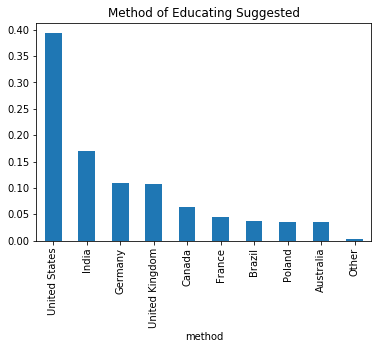

,count
method,
United States,0.392980
India,0.169974
Germany,0.110040
United Kingdom,0.107620
Canada,0.063687
France,0.044853
Brazil,0.036542
Poland,0.036055
Australia,0.035698


In [150]:
possible_vals=possible_values_in_column('Country')

def clean_and_plot(df,column_name, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe 
        column_name - string - the name of the column you would like to know about
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    possible_vals=possible_values_in_column(column_name)
    data = df[column_name].value_counts().reset_index()
    data.rename(columns={'index': 'method', column_name: 'count'}, inplace=True)
    data_df = total_count(data, 'method', 'count', possible_vals)

    data_df.set_index('method', inplace=True)
    if plot:
        (data_df/data_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_data_df = data_df/data_df.sum()
    return props_data_df
    
props_df = clean_and_plot(df,'Country')
props_df

In [151]:
def most_freq(column_name):
    '''
    INPUT - column_name - string - the name of the column you would like to know about
    
    OUTPUT - result - string - the count pf indivisual in the column
    '''
    result = df[column_name].mode()
    c = df[column_name].value_counts().max()
    result = result + " " + str(c)
    return result

most_freq('Country')

0    United States 20949
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f243c967908>,
      dtype=object)

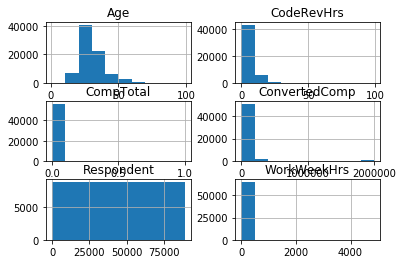

In [152]:
df.hist()

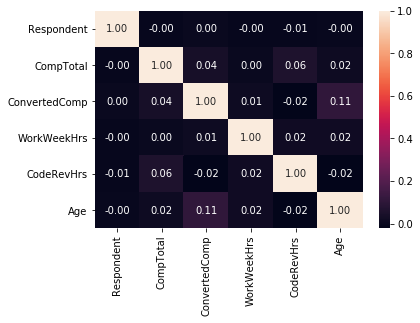

In [153]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [154]:
df = df.dropna(subset = ['ConvertedComp'],how='any')

In [155]:
df.shape[0]

55823

In [156]:
ls = ['Respondent','OpenSourcer','Age1stCode', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'LastHireDate', 'LastInt', 'FizzBuzz', 
      'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'WorkPlan', 
      'WorkChallenge', 'ImpSyn', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear',
      'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 
      'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 
      'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson',
      'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisitTo',
      'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 
      'SOComm', 'WelcomeChange', 'SONewContent', 'Dependents','SurveyLength','SurveyEase','JobSeek','CodeRev','Trans',
       'Sexuality', 'Ethnicity']

In [157]:
df= df.drop(columns= ls, axis = 1)
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'ConvertedComp', 'WorkWeekHrs', 'WorkRemote', 'WorkLoc', 'CodeRevHrs', 'UnitTests', 'Age', 'Gender'], dtype='object')

In [158]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1]  #Provide the number of columns in the dataset
print(num_rows,num_cols)

55823 23


In [159]:
df.shape[1]

23

In [160]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

19

In [162]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [163]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

cat_df.shape[1]
cat_cols_lst = cat_df.columns
df = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function


In [164]:
df.head(5)


,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",Hobbyist_Yes,"OpenSource_OSS is, on average, of LOWER quality than proprietary / closed source software",OpenSource_The quality of OSS and closed source software is about the same,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed",Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_Norway,Country_Oman,Country_Other Country (Not Listed Above),Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,"Student_Yes, full-time","Student_Yes, part-time","EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,"UndergradMajor_A health science (ex. nursing, pharmacy, radiology)","UndergradMajor_A humanities 

In [165]:
fill_mean = lambda col: col.fillna(col.mean())

In [115]:
df.apply(fill_mean,axis=0)

In [116]:
df.to_csv('allfield.csv')

In [117]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

In [120]:
y = df['ConvertedComp']

In [121]:
x = df.drop(columns=['ConvertedComp'])

In [130]:
re = np.sum(np.sum(y.isna()))
re

0

In [125]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [131]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [133]:
r2_scores_test=(r2_score(y_test, y_test_preds))
r2_scores_train=(r2_score(y_train, y_train_preds))


print(r2_scores_train)
print("       ")
print(r2_scores_test)

1.0
       
1.0


In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['ConvertedComp'], axis=0)
    y = df['ConvertedComp']
    
    #Drop respondent and expected salary columns
    df = df.drop(ls, axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df) 

In [ ]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [ ]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

In [ ]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)